<a href="https://colab.research.google.com/github/Deanna1117/2048/blob/master/Logistic_Regression_1207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [3]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


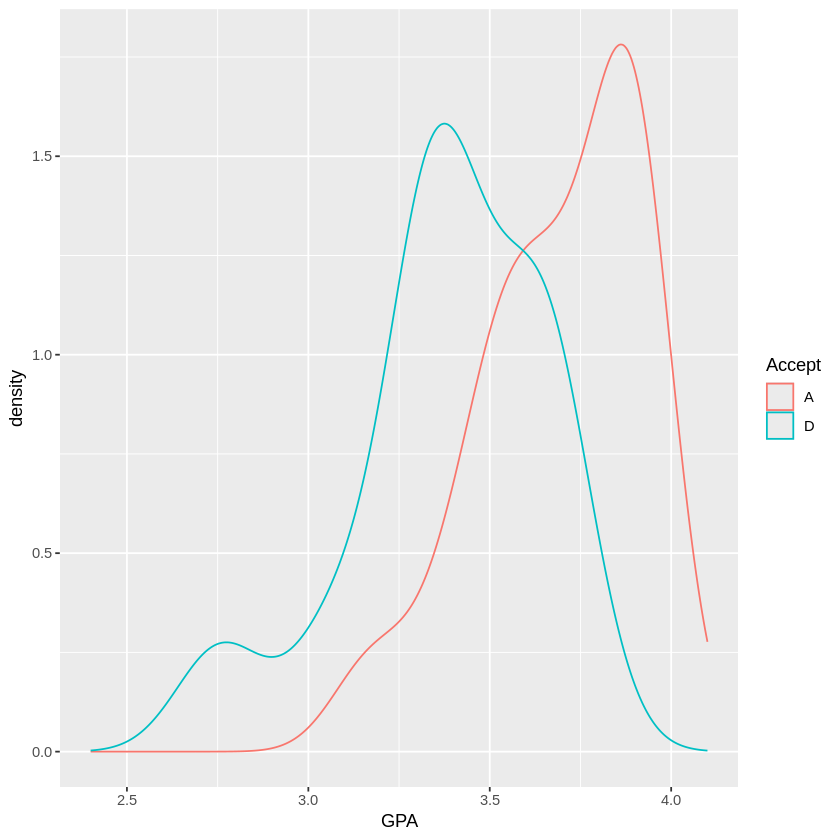

In [ ]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





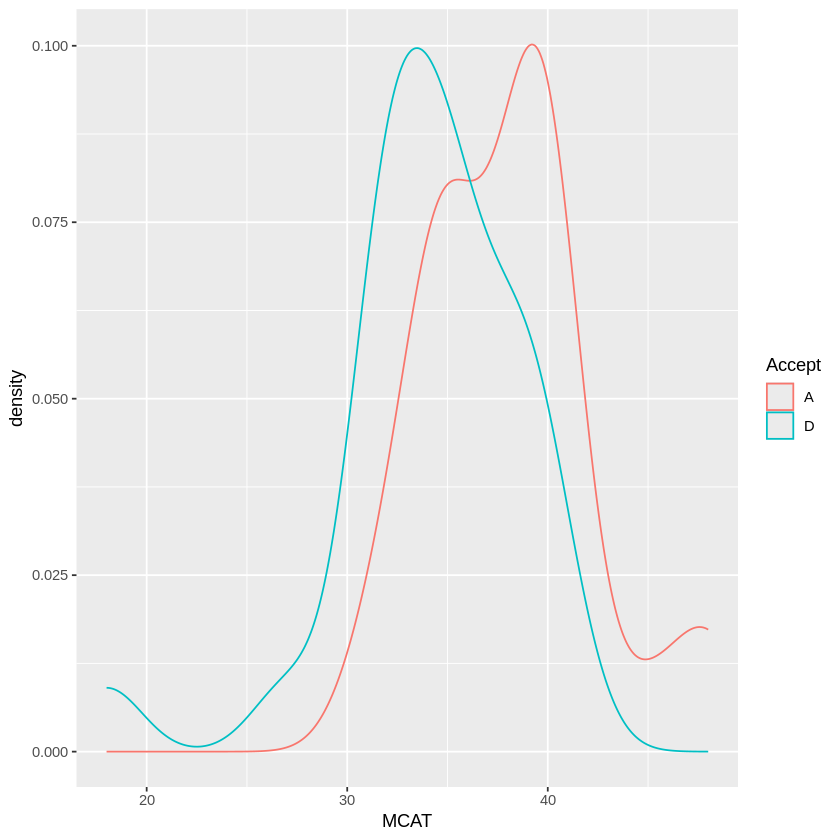

In [7]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



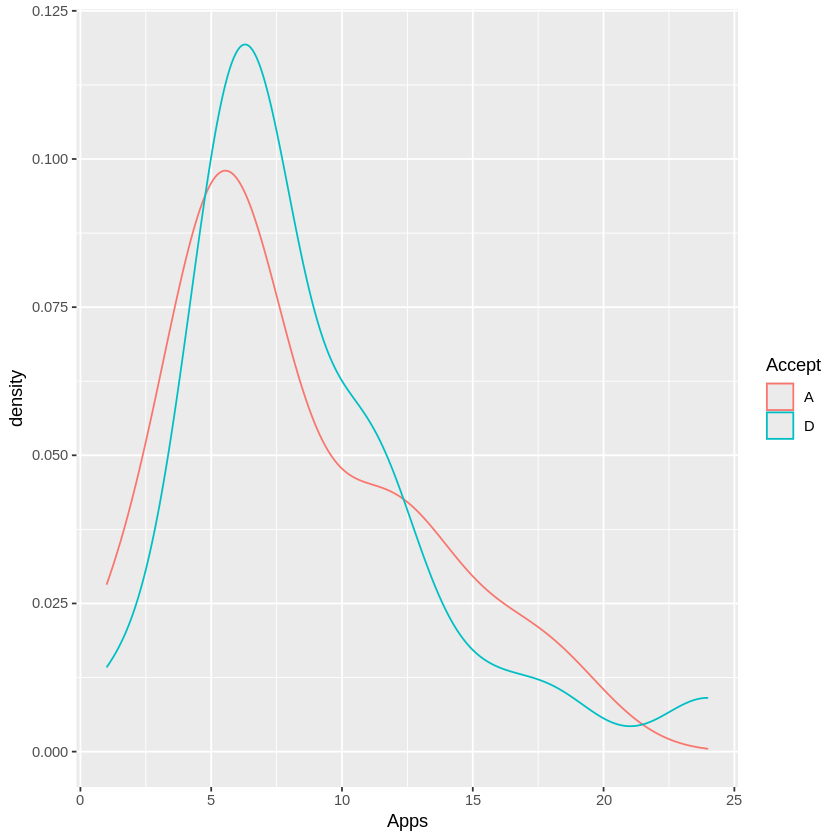

In [15]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


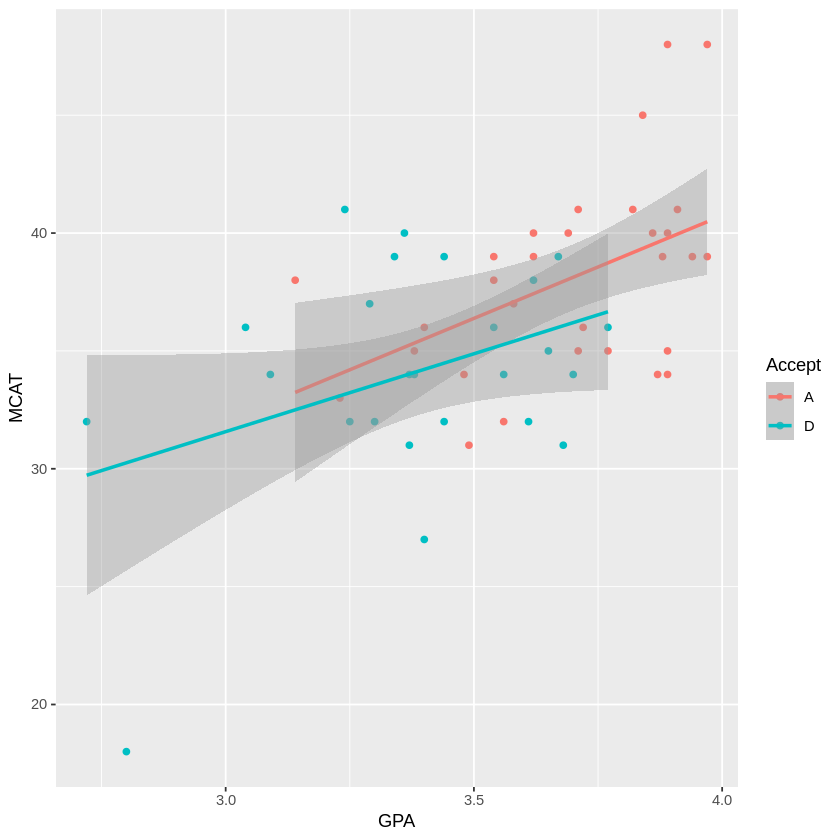

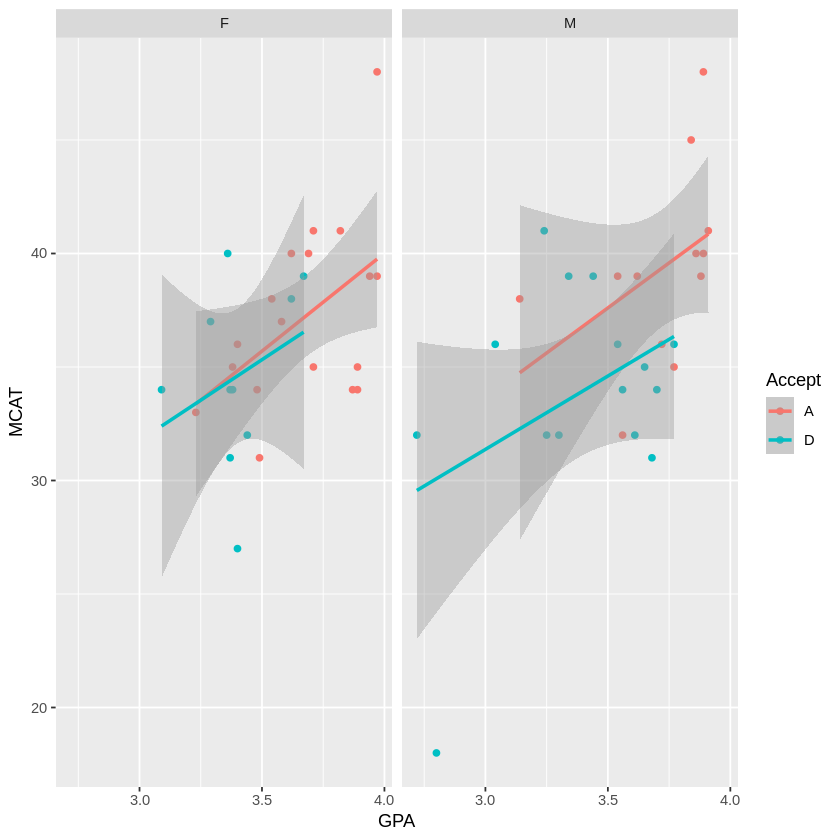

In [16]:
mydata %>%
 ggplot() +
 aes(x = GPA, y = MCAT, col = Accept) +
 geom_point()+
 geom_smooth(method = "lm")

mydata %>%
 ggplot() +
 aes(x = GPA, y = MCAT, col = Accept) +
 geom_point()+
 facet_wrap(~Sex)+
 geom_smooth(method = "lm")


In [11]:
# prompt: correlation beteween GPA values and MCAT values for Accepted and Denied candidates separately

# Calculate the correlation between GPA and MCAT for accepted and denied candidates separately
cor_accepted <- cor(mydata$GPA[mydata$Accept == "A"], mydata$MCAT[mydata$Accept == "A"])
cor_denied <- cor(mydata$GPA[mydata$Accept == "D"], mydata$MCAT[mydata$Accept == "D"])

# Print the correlation coefficients
cat("Correlation between GPA and MCAT for Accepted candidates:", cor_accepted, "\n")
cat("Correlation between GPA and MCAT for Denied candidates:", cor_denied, "\n")

Correlation between GPA and MCAT for Accepted candidates: 0.4673053 
Correlation between GPA and MCAT for Denied candidates: 0.370702 


Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


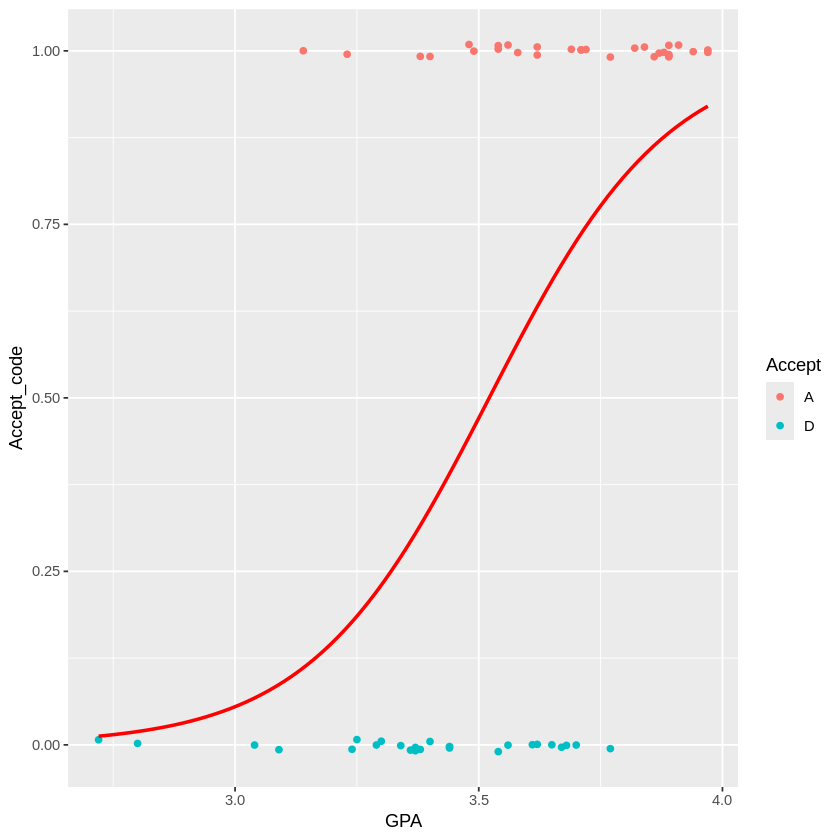

In [ ]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


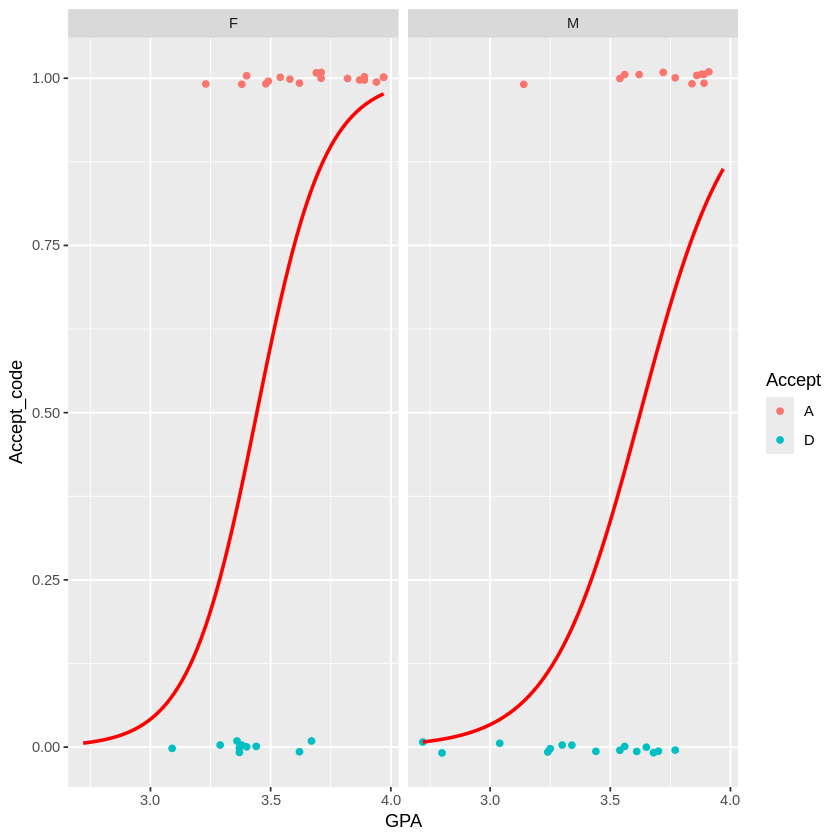

In [4]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)+
facet_wrap(~Sex)

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [5]:

model <- glm(Accept_code ~ GPA + Sex, data = mydata, family = "binomial")
summary(model)


Call:
glm(formula = Accept_code ~ GPA + Sex, family = "binomial", data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.0680     6.4025  -3.291 0.001000 ***
GPA           6.1324     1.8283   3.354 0.000796 ***
SexM         -1.1697     0.7178  -1.629 0.103210    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.945  on 52  degrees of freedom
AIC: 59.945

Number of Fisher Scoring iterations: 5


Q9: Write down equations of the two fitted logistic curves.

Female = e^(-21.07+6.1324)/1 + e^(-21.07+6.1324)

Female = e^(-21.07+6.1324*GPA)/1 + e^(-21.07+6.1324*GPA)
Male = e^(-22.24+6.1324*GPA)/1 + e^(-22.24+6.1324*GPA)

Q10: What is the $R^2$ of your model?  Do you see one in your model output?